In [201]:
import pandas as pd 
import numpy as np 
import math
import random

## Below is the multinomial naive bayes classifier implementation from scratch

In [251]:
class multiNB:
    
    def __init__(self, alpha=0.3):   #here we're using alpha=0.1 to smooth our table of likelihoods
        self.alpha = alpha  
       
        
    def fit(self, X_train, y_train):
        
        samples_no, no_features = X_train.shape #get the number of rows and columns using the .shape method
        
        
        self.classes_= np.unique(y_train) #get the unique classes in our dataset
        
        no_classes = len(self.classes_)   #get the numbr of the unique classes in our dataset
        
        #inititalising our priors and likelihoods
        
        self.priors_ = np.zeros(no_classes)
        self.likelihoods_ = np.zeros((no_classes, no_features))
        
        #here we're finding our priors and likelihoods
        
        for indx, single_class in enumerate(self.classes_):
            X_train_clss = X_train[single_class == y_train]
            self.priors_[indx] = (X_train_clss.shape[0]/ float(samples_no)) #X_class.shape[0] gets the number of samples with single_class as the label
            self.likelihoods_[indx, :] = ((X_train_clss.sum(axis=0)) + self.alpha) / (np.sum(X_train_clss.sum(axis=0) + self.alpha)) #we include alpha here to smooth our table of likelihoods
            
      
    def predictSinglePoint(self, x):
        #calculate the posterior probability
        
        posteriors = []    
        
        #x = float(x)
        
        for indx, single_class in enumerate(self.classes_): #get the index and class labels using the enumerate function
            prior =np.log(self.priors_[indx]) #we use the priors we calculated in our fit method
        
            #calculate the likelihood and the prior for each class 
            likelihood_class = np.log(self.likelihoods_[indx, :]).dot(x)
            
            total = np.sum(likelihood_class) #sum all our class likelihoods
            posterior = prior + total
            
            posteriors.append(posterior)
            
        #choose the class with the highest probability using the inbuilt numpy argmax function
        
        output = self.classes_[np.argmax(posteriors)]
        
        return output
    
    def predict(self, X_test):
        result = []
        
        for x in X_test:
            prediction = self.predictSinglePoint(x) #here we get the prediction for each given row
            result.append(prediction)               #append the prediction to our list of results
        
        return result
    
    def acc_score(self, X_test, y_test):
        
        #this function returns our model's accuracy
        
        y_predicted = self.predict(X_test)
        score = float(np.sum(y_predicted==y_test)/len(y_test))
        
        return score

## Below we're importing the dataset we'll be using from the github repository.

In [252]:
col_names = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

train_raw = pd.read_csv('https://raw.githubusercontent.com/Izinja-The-Dogs/Machine-Learning-Project/master/train.csv')
test_raw = pd.read_csv('https://raw.githubusercontent.com/Izinja-The-Dogs/Machine-Learning-Project/master/test.csv')

test_IDs = test_raw['PassengerId'].values

#He're we assigning the values 0 and 1 to our train and test dataset so we can be able to distinguish them
train_raw['train'] = 1
test_raw['train'] = 0

#we then merge the train set and test set to create one dataset
data = train_raw.append(test_raw, sort = False)

In [253]:
print("Here's a few sample data points from the dataset")
data.head()

Here's a few sample data points from the dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [254]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [255]:
data.shape

(1309, 13)

### From the above output we can see that we have 1309 sample points in our dataset with 13 features

## We then start with our data preprocessing where we clean the data, select the best features, and also do some feature engineering

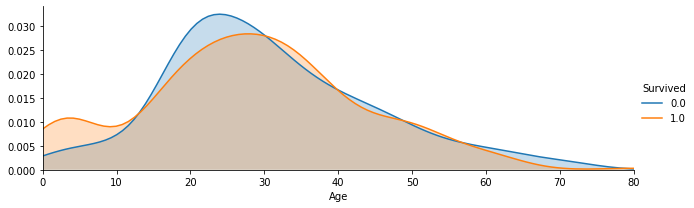

In [256]:
s = sns.FacetGrid(dataset,hue='Survived',aspect=3)
s.map(sns.kdeplot,'Age',shade=True)
s.set(xlim=(0,dataset['Age'].max()))
r = s.add_legend()

## From the above graph we can see that the survival rate of children is higher than the other  age groups

In [257]:
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

data = data[features + [target] + ['train']]

#transforming categorical values into numerical values as our model is designed to work with numerical values only

#The features: 'Sex', 'Embarked' are the ones which we'll be coverting to numeric
data['Sex'] = data['Sex'].map({'female':0, 'male':1})
data['Embarked'] = data['Embarked'].map({'S':1, 'C':2, 'Q':3})

#We discretize 'Age' as it is continous and we're trying to work with discrete values only
data['Age'] = pd.qcut(data['Age'].rank(method='first'), 10, labels = False)



## We then look for any missing values in our dataset that might cause our model to malfunction, if there's any, we then replace it with the next value below it

In [258]:
data.isnull().sum()

Age         263
Embarked      2
Fare          1
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived    418
train         0
dtype: int64

## From here we can see that Age, Embarked, Fare, and Survived have missing values. As a result, we'll insert values in the missing spaces.

In [259]:
#ffill is a forward fill method that replaces the null values with the value below them
data.fillna(method="ffill", inplace=True)

In [260]:
data.isnull().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
train       0
dtype: int64

## This shows that we've managed to deal with the missing values

## Below is our processed dataset without the missing values


In [261]:
data.head(10)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,train
0,2.0,1.0,7.2500,0,3,1,1,0.0,1
1,7.0,2.0,71.2833,0,1,0,1,1.0,1
2,4.0,1.0,7.9250,0,3,0,0,1.0,1
3,6.0,1.0,53.1000,0,1,0,1,1.0,1
4,6.0,1.0,8.0500,0,3,1,0,0.0,1
5,6.0,3.0,8.4583,0,3,1,0,0.0,1
6,9.0,1.0,51.8625,0,1,1,0,0.0,1
7,0.0,1.0,21.0750,1,3,1,3,0.0,1
8,4.0,1.0,11.1333,2,3,0,0,1.0,1
9,0.0,2.0,30.0708,0,2,0,1,1.0,1


In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## We then do some data exploration

Below is the correlation matrix between all the numerical values


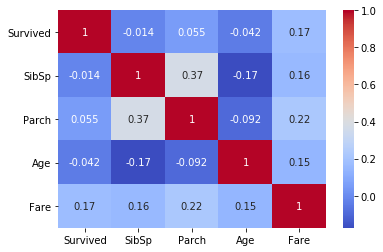

In [263]:
print("Below is the correlation matrix between all the numerical values")

crr_matrix = sns.heatmap(data[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, cmap = "coolwarm")

## We can see that the correlation between numerical values and the Survived column is not so high, but it doesn't mean that the other features are useless.

## We then look at how each feature affects the survival rate

relation between Fare and survived


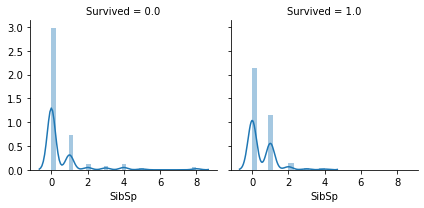

In [264]:
print("relation between Fare and survived")
a = sns.FacetGrid(dataset, col='Survived').map(sns.distplot, 'SibSp')

relation between SibSp  and survived


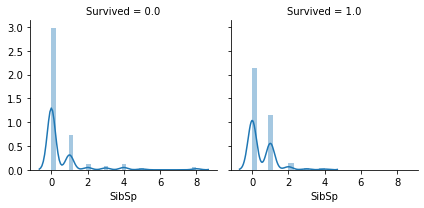

In [265]:
print("relation between SibSp  and survived")
a = sns.FacetGrid(dataset, col='Survived').map(sns.distplot, 'SibSp')

relation between Age  and survived


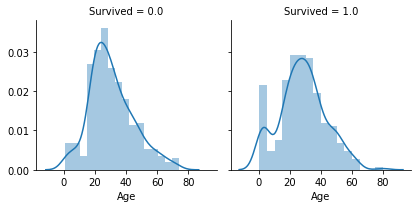

In [266]:
print("relation between Age  and survived")
a = sns.FacetGrid(dataset, col='Survived').map(sns.distplot, 'Age')

relation between Pclass  and survived


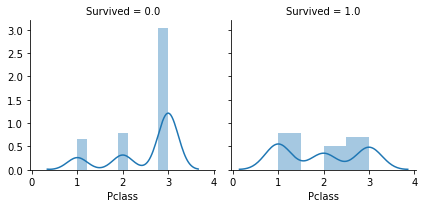

In [267]:
print("relation between Pclass  and survived")
a = sns.FacetGrid(dataset, col='Survived').map(sns.distplot, 'Pclass')

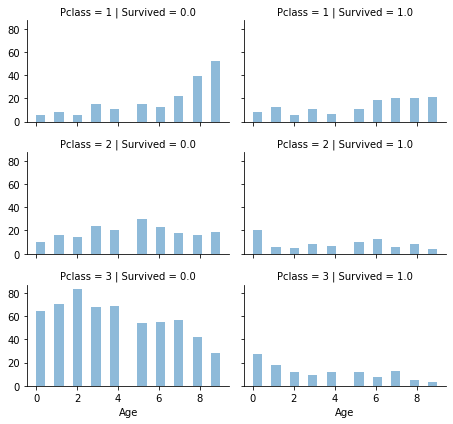

In [268]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', height=2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

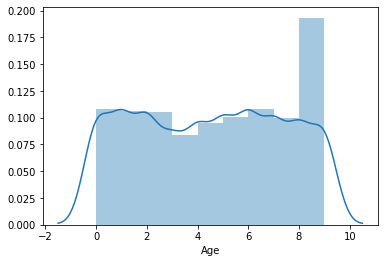

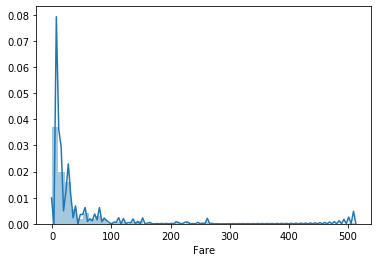

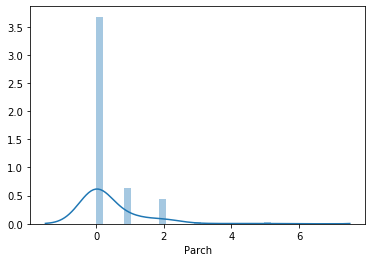

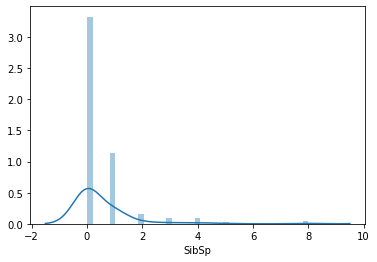

In [269]:
continuous_features = ['Age', 'Fare', 'Parch', 'SibSp']
for feature in continuous_features:
    sns.distplot(training_set[feature],kde_kws={'bw':0.5})
    plt.show()

## We can see that Fare, SibSp, and Parch have a distribution that is almost normal and is slightly skewed to the left while age has a distribution close to Gaussian.

# We then split our data into training and validation using a 70-30 split ratio

In [270]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3, random_state=42)

In [271]:
clsf = multiNB()

In [272]:
print("Model training in session.......")
clsf.fit(X_train, y_train)
print("Model training complete")

Model training in session.......
Model training complete


In [273]:
predictions = clsf.predict(X_test.values)
accuracy = round(clsf.acc_score(predictions, y_test), 8)
print("Our model achieved an accuracy of " + str(accuracy) + ", which is approximately " + str(round(accuracy*100,3)) + "%")

Our model achieved an accuracy of 0.92620865, which is approximately 92.621%


## Our model perfomed very well given that we didn't use any help from the scikit library

The confusion matrix is:
[[256  29]
 [  0 108]]
Here's a nice visual form of the matrix


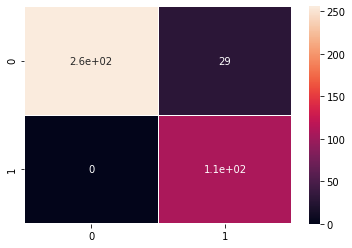

In [274]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions )
print("The confusion matrix is:")
print(conf_matrix )

print("Here's a nice visual form of the matrix")
a = sns.heatmap(conf_matrix, annot=True, linewidths=.1)

# Comparing our model with the scikit naive bayes:

In [194]:
from sklearn.naive_bayes import MultinomialNB

##Here we train our model using the Multinomial Naive Bayes Classifier from the scikit learn library
nbClassifier = MultinomialNB(alpha=1.0)
nbClassifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [200]:
from sklearn.metrics import accuracy_score



y_pred = nbClassifier.predict(X_test)
acc_score = round(accuracy_score(y_test, y_pred),9)

print("The scikit learn model has an accuracy of " + str(acc_score) + ", which is approximately " + str(round(acc_score*100,3)) + "%")

The scikit learn model has an accuracy of 0.908396947, which is approximately 90.84%


# Our model out-perfomed the scikit learn model by a difference of 1.781%

In [275]:
class gaussNB:

    def fit
    
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]
            

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    
    def acc_score(self, X_test, y_test):
        
        
        y_predicted = self.predict(X_test)
        score = float(np.sum(y_predicted==y_test)/len(y_test))
        
        return score

In [286]:
sifier = gaussNB()

In [287]:
sifier.fit(X_train, y_train)

In [288]:
predictions2 = sifier.predict(X_test.values)
accuracy = round(sifier.acc_score(predictions2, y_test), 8)
print("Our model achieved an accuracy of " + str(accuracy) + ", which is approximately " + str(round(accuracy*100,3)) + "%")

Our model achieved an accuracy of 0.72519084, which is approximately 72.519%


C:\Users\Percy Mohlala\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Percy Mohlala\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Percy Mohlala\anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


The confusion matrix is:
[[285   0]
 [108   0]]
Here's a nice visual form of the matrix


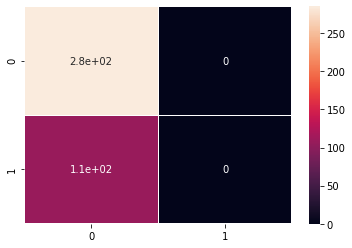

In [289]:
conf_matrix2 = confusion_matrix(y_test, predictions2 )
print("The confusion matrix is:")
print(conf_matrix2 )

print("Here's a nice visual form of the matrix")
a = sns.heatmap(conf_matrix2, annot=True, linewidths=.1)

In [308]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [309]:
clss2 = LogisticRegression()

In [310]:
clss2.fit(X_train, y_train)

In [311]:
predictions3 = clss2.predict(X_test.values)
#accuracy = round(clss2.acc_score(predictions3, y_test), 8)
#print("Our model achieved an accuracy of " + str(accuracy) + ", which is approximately " + str(round(accuracy*100,3)) + "%")

In [316]:
#predictions3

In [313]:
predictions3.shape

(393,)

In [314]:
y_test.shape
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

(393,)

In [317]:
accuracy3 = accuracy_score(predictions3, y_test)

In [319]:
print("Our model achieved an accuracy of " + str(accuracy3) + ", which is approximately " + str(round(accuracy3*100,3)) + "%")

Our model achieved an accuracy of 0.7430025445292621, which is approximately 74.3%


The confusion matrix is:
[[282   3]
 [ 98  10]]
Here's a nice visual form of the matrix


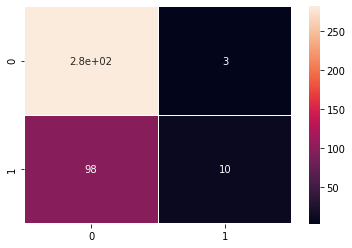

In [320]:
conf_matrix3 = confusion_matrix(y_test, predictions3 )
print("The confusion matrix is:")
print(conf_matrix3 )

print("Here's a nice visual form of the matrix")
a = sns.heatmap(conf_matrix3, annot=True, linewidths=.1)